The data set I downloaded data on the loans that were administered through Lending Club, which is a peer to peer lending company. <br>
Each record corresponds to a loan, and our data set contains over 100,000 records on loans given out during the second quarter of 2018. 

Download the data from the link: 
https://www.lendingclub.com/info/download-data.action

Through this data set, the questions we seek to answer are: <br>
    Q) Do people in higher income brackets tend to take bigger loans? <br>
    Q) Do people in higher income brackets tend to recieve lower interest rates? <br>
So across income brackets, we are observing the differences in two statistics, and seeing how big or small these differences are.

Extra Credit: <br>
1) The data set has over 5000 records
2) Plot of results displayed (data visualization)

We first open the data set to see if the description is in the text file. If it is, we remove it. The description stops the csv file from being read properly. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#If the description text is there, delete it.
remove_header = False
with open('LoanStats_2018Q2.csv', encoding='utf-8') as f:
    content = f.read()
    header_len = len('Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)\n')
    if content[:header_len] == 'Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)\n':
        remove_header = True
        
if remove_header == True: 
    with open('LoanStats_2018Q2.csv', encoding='utf-8', mode='w') as f:
        f.write(content[header_len:].strip())
        
table = pd.read_csv('LoanStats_2018Q2.csv', low_memory=False, nrows = 100000)


In [3]:
print(table.shape)
table.head(10)



(100000, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000,36 months,20.39%,373.63,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,20000,20000,20000,60 months,13.06%,455.68,C,C1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,14000,14000,14000,60 months,10.56%,301.34,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,8000,8000,8000,36 months,6.83%,246.40,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,22000,22000,22000,60 months,17.47%,552.34,D,D1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,6000,6000,6000,36 months,16.46%,212.31,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,12000,12000,12000,60 months,19.42%,314.07,D,D3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,35000,35000,35000,60 months,22.90%,984.66,E,E1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,7200,7200,7200,36 months,5.31%,216.80,A,A1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,5000,5000,5000,36 months,6.83%,154.00,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


<br>
We delete the columns that have over 90% of its values as NaN and we also delete the columns that have all of it's values equal to N. These columns do not provide much information, especially in regards to comparing the different income brackets. They are mostly if not entirely arbitrary to our analysis. 
<br>

In [4]:
table.dropna(thresh= len(table)*.9, axis=1, inplace=True)
bool_table = table.applymap(lambda x : x=='N')
mask = table.columns[bool_table.all(axis=0)]
table.drop(mask, axis=1, inplace=True)
table.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,10000,10000,10000,36 months,20.39%,373.63,D,D4,Realtor,3 years,...,100.0,0,0,78151,64253,2200,42451,N,Cash,N
1,20000,20000,20000,60 months,13.06%,455.68,C,C1,Business Analyst,6 years,...,50.0,0,0,554201,69467,55700,25201,N,DirectPay,N
2,14000,14000,14000,60 months,10.56%,301.34,B,B3,Product Manager,8 years,...,16.7,0,0,277254,76757,63500,79008,N,Cash,N
3,8000,8000,8000,36 months,6.83%,246.40,A,A3,City Attorney,2 years,...,0.0,0,0,484141,255345,25100,282141,N,Cash,N
4,22000,22000,22000,60 months,17.47%,552.34,D,D1,Laborer,10+ years,...,33.3,1,0,142179,120562,30800,109379,N,DirectPay,N
5,6000,6000,6000,36 months,16.46%,212.31,C,C5,NaN,n/a,...,100.0,0,0,8100,6103,4900,0,N,Cash,N
6,12000,12000,12000,60 months,19.42%,314.07,D,D3,Operations Manager,1 year,...,0.0,0,0,2600,301,1400,0,N,Cash,N
7,35000,35000,35000,60 months,22.90%,984.66,E,E1,Systems Analyst,2 years,...,0.0,0,0,173294,66614,48200,20805,N,Cash,N
8,7200,7200,7200,36 months,5.31%,216.80,A,A1,Medical assistant,8 years,...,0.0,0,0,29800,21198,19000,9500,N,DirectPay,N
9,5000,5000,5000,36 months,6.83%,154.00,A,A3,Crew member,10+ years,...,10.0,0,0,122158,20760,60900,45058,N,Cash,N


<br>
We narrow the dataset down further by selecting columns. The key columns are 'loan_amnt', 'int_rate', and 'annual_inc' however other columns were also added to display futher important information about the loan. In addition the values are related to the key columns (perhaps with the exception of 'purpose'). <br>

We also rescale the size of the 'annual_inc' column so we can work with two to three digit income brackets, and convert the values in 'int_rate' from percentage strings to floats so we can work with them. 


In [5]:
table1 = table.loc[:,['loan_amnt','term','int_rate','installment','home_ownership','annual_inc','purpose']]
table1['annual_inc'] = table1['annual_inc'].map(lambda x : x/1000)
table1.rename(columns={'annual_inc':'annual_inc in 1000s'}, inplace=True)

table1['int_rate'] = [float(x.strip('%')) for x in table1.loc[:,'int_rate']]
table1.head(10)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc in 1000s,purpose
0,10000,36 months,20.39,373.63,OWN,26.000,debt_consolidation
1,20000,60 months,13.06,455.68,MORTGAGE,94.000,debt_consolidation
2,14000,60 months,10.56,301.34,MORTGAGE,98.000,credit_card
3,8000,36 months,6.83,246.40,MORTGAGE,144.000,debt_consolidation
4,22000,60 months,17.47,552.34,OWN,60.000,credit_card
5,6000,36 months,16.46,212.31,OWN,20.388,debt_consolidation
6,12000,60 months,19.42,314.07,OWN,95.000,debt_consolidation
7,35000,60 months,22.90,984.66,OWN,97.000,home_improvement
8,7200,36 months,5.31,216.80,RENT,48.000,debt_consolidation
9,5000,36 months,6.83,154.00,RENT,35.000,debt_consolidation


We cut the values of the annual incomes into 5 income brackets, and we map the cut from intervals to their corresponding string representations. 

In [6]:
cuts = pd.cut(table1['annual_inc in 1000s'],[0,30,60,90,120,np.inf], right=False)
cuts.head()
str_cuts = cuts.map(str)
str_cuts.head()

0      [0.0, 30.0)
1    [90.0, 120.0)
2    [90.0, 120.0)
3     [120.0, inf)
4     [60.0, 90.0)
Name: annual_inc in 1000s, dtype: category
Categories (5, object): [[0.0, 30.0) < [30.0, 60.0) < [60.0, 90.0) < [90.0, 120.0) < [120.0, inf)]

<br>
We create a multi-index with income bracket as the first index and then the number of the record as the second index.<br>

The we sort the records by income so that the different income brackets are grouped separately in the data set. 

In [7]:
index = [str_cuts,table1.index]
table2 = pd.DataFrame(table1.values , columns=table1.columns, index=index)
table2 = table2.rename_axis(["inc_bracket",""]) 
table2.sort_values('annual_inc in 1000s', inplace=True)
table2.head()


loan_amnt        term int_rate installment home_ownership  \
inc_bracket                                                                   
[0.0, 30.0) 6012      28000   36 months    20.39     1046.16            OWN   
            55016      2100   36 months     8.08       65.89       MORTGAGE   
            6292       4200   36 months    11.05      137.61           RENT   
            69720     15175   36 months    24.84      602.08           RENT   
            64916     32050   36 months     9.58     1027.86       MORTGAGE   

                  annual_inc in 1000s             purpose  
inc_bracket                                                
[0.0, 30.0) 6012                    0         credit_card  
            55016                   0               other  
            6292                    0               other  
            69720                   0  debt_consolidation  
            64916                   0         credit_card

In [8]:
table2.tail()

loan_amnt        term int_rate installment home_ownership  \
inc_bracket                                                                    
[120.0, inf) 40282     37000   60 months    13.06      843.01       MORTGAGE   
             5652      25000   60 months    11.05      544.19       MORTGAGE   
             8938       2000   36 months    13.06       67.45            OWN   
             28827     35000   60 months    11.05      761.86       MORTGAGE   
             28266      8400   36 months    19.42       309.7           RENT   

                   annual_inc in 1000s             purpose  
inc_bracket                                                 
[120.0, inf) 40282              5579.5         credit_card  
             5652              6118.05  debt_consolidation  
             8938                 6200               other  
             28827             7600.03  debt_consolidation  
             28266                9300  debt_consolidation

<br>
We compute the average loan for each income bracket.<br>

We see that clients in higher income brackets took out larger loans on average, and we see that the loans increase uniformly with income bracket. The differences in average loan were relatively large. The correlation was less than linear, but it is still clear that those with a higher income tend to take out loans that are significantly larger. 

In [14]:
print(f"The average loan ammount for all lenders is ${table2['loan_amnt'].mean():,.2f}")
brackets = ['[0.0, 30.0)', '[30.0, 60.0)', '[60.0, 90.0)', '[90.0, 120.0)', '[120.0, inf)']
avg_loan_amnt = [table2.loc[i].loc[:,'loan_amnt'].mean() for i in brackets]
brackets.append('all brackets')
avg_loan_amnt.append(table2['loan_amnt'].mean())
avg_loan_amnt_str = [f'${val:,.2f}' for val in avg_loan_amnt]

avg_loans_by_bracket = pd.Series(avg_loan_amnt_str, index=brackets, name='loan by income bracket')
avg_loans_by_bracket.index.name = 'income bracket'
avg_loans_by_bracket

The average loan ammount for all lenders is $15,914.39


income bracket
[0.0, 30.0)      $10,257.61
[30.0, 60.0)     $12,385.90
[60.0, 90.0)     $16,111.73
[90.0, 120.0)    $19,638.23
[120.0, inf)     $23,126.45
all brackets     $15,914.39
Name: loan by income bracket, dtype: object

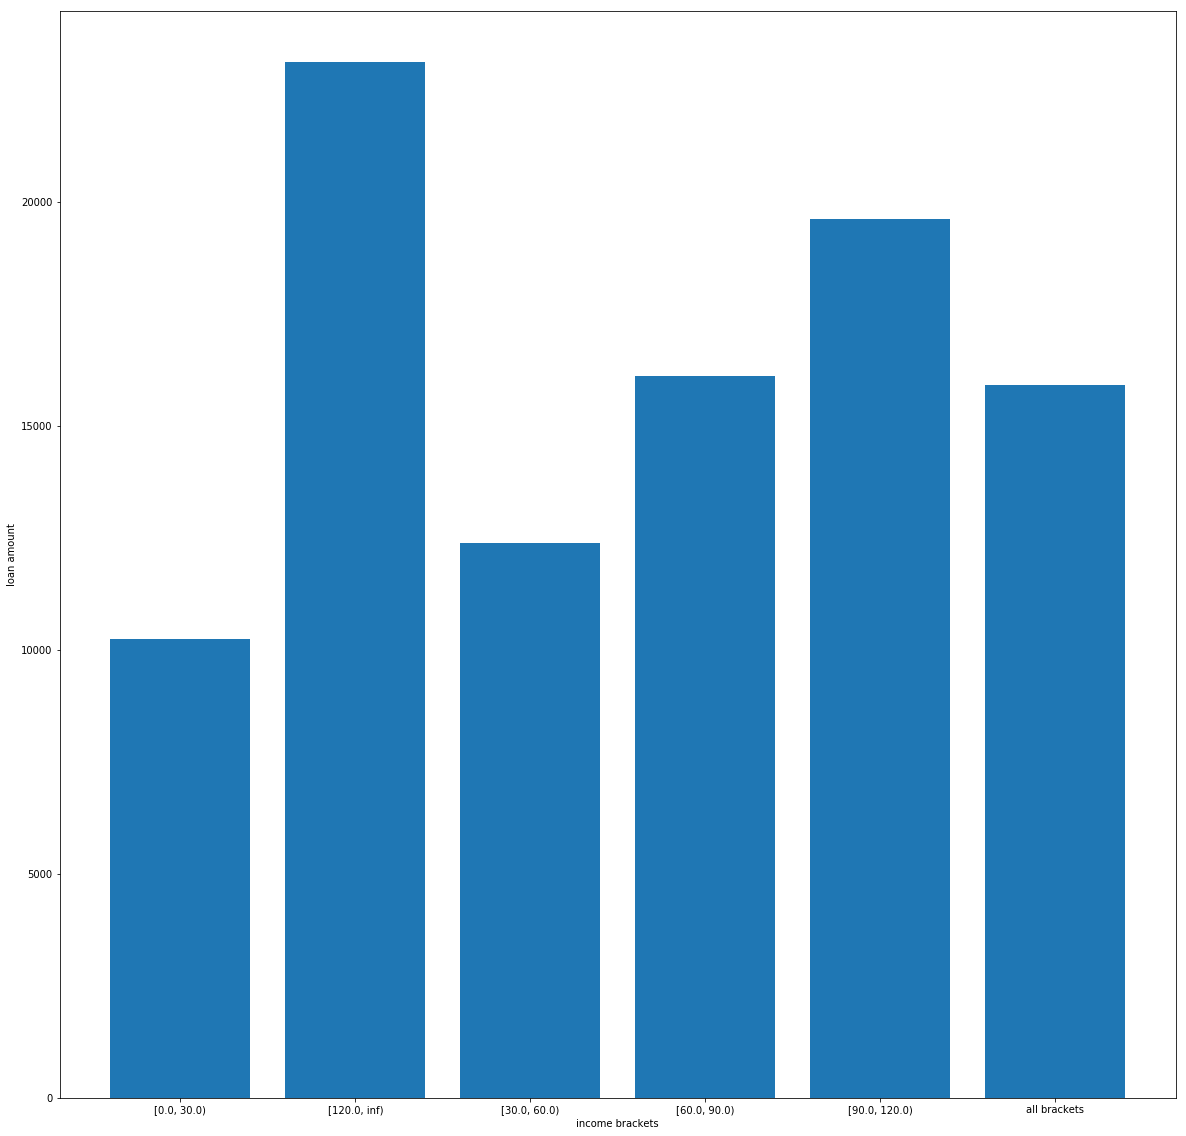

In [15]:
plt.figure(figsize=(20,20))
plt.bar(brackets, avg_loan_amnt)
plt.xlabel('income brackets') 
plt.ylabel('loan amount')
plt.show()

<br>
We compute the average interest rate for each income bracket. <br>

We see that clients in higher income brackets have smaller interest rates, and the interest rate decreases uniformly with tax bracket. The difference between the average interest rates are significant. However, I hesitate to say that the differences are relatively large. Going from one level of the income brackets to another adjacent level, the interest rate changes less than 1% in all cases, and the differences are usually much less than 1%. 

In [16]:
print(f"The average interest rate for all lenders is {table2['int_rate'].mean():.2f}%")
brackets = ['[0.0, 30.0)', '[30.0, 60.0)', '[60.0, 90.0)', '[90.0, 120.0)', '[120.0, inf)']
avg_int_rate = [table2.loc[i].loc[:,'int_rate'].mean() for i in brackets]
brackets.append('all brackets')
avg_int_rate.append(table2['int_rate'].mean())
avg_int_rate_str = [f'{val:,.2f}%' for val in avg_int_rate]

avg_int_rate_by_bracket = pd.Series(avg_int_rate_str, index=brackets, name='int_rate by income bracket')
avg_int_rate_by_bracket.index.name = 'income bracket'
avg_int_rate_by_bracket

The average interest rate for all lenders is 12.60%


income bracket
[0.0, 30.0)      13.72%
[30.0, 60.0)     13.09%
[60.0, 90.0)     12.51%
[90.0, 120.0)    12.07%
[120.0, inf)     11.55%
all brackets     12.60%
Name: int_rate by income bracket, dtype: object

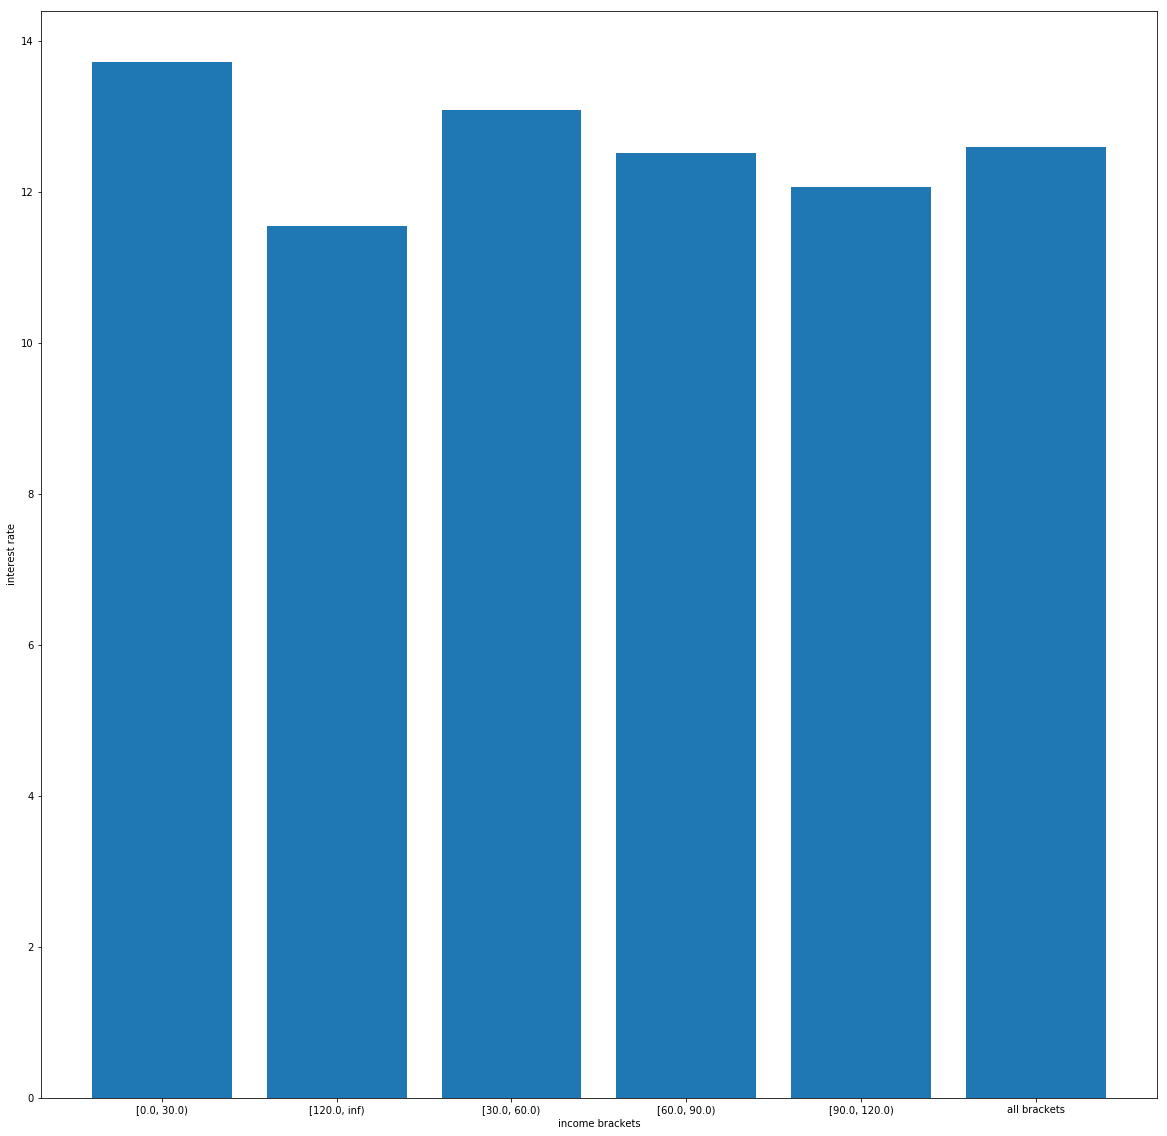

In [17]:
plt.figure(figsize=(20,20))
plt.bar(brackets, avg_int_rate)
plt.xlabel('income brackets') 
plt.ylabel('interest rate')
plt.show()


Exporting the new data set to a csv file. 

Here are the number of records in each income bracket.

In [18]:
brackets = ['[0.0, 30.0)', '[30.0, 60.0)', '[60.0, 90.0)', '[90.0, 120.0)', '[120.0, inf)']
counts = [table2.loc[i].loc[:,'int_rate'].count() for i in brackets]
counts_by_income = pd.Series(counts, index=brackets, name='counts of brackets')
counts_by_income

[0.0, 30.0)       7284
[30.0, 60.0)     34516
[60.0, 90.0)     29559
[90.0, 120.0)    14162
[120.0, inf)     14479
Name: counts of brackets, dtype: int64

In [19]:
table2.to_csv('new_data.csv')

The calculations are also confirmed in google spreadsheets, and are in the file new_data_with_calcs.xlsx